In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install hmmlearn
!pip install -U PyYAML

     |████████████████████████████████| 374 kB 4.0 MB/s 
     |████████████████████████████████| 636 kB 4.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


La descarga de datos para el ejemplo se puede realizar desde el siguiente link:

https://finance.yahoo.com/quote/SPY/history?p=SPY

Model Score: 4349.122719320311


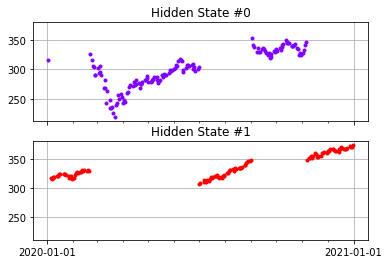

In [ ]:
from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
#definimos una primera funcion que nos lea los datos del csv previamente descargado de yahoo y añada una columna llamada retornos y elimine los na
def obtain_prices_df(csv_filepath, end_date):
    #Leemos el csv
    df = pd.read_csv(
        csv_filepath, header=0,
        names=[
            "Date", "Open", "High", "Low", 
            "Close", "Adj Close", "Volume"
        ],
        index_col="Date", parse_dates=True
    )
    #Definimos la columna de retornos y eliminamos na 
    df["Returns"] = df["Adj Close"].pct_change()
    df = df[:end_date.strftime("%Y-%m-%d")]
    df.dropna(inplace=True)
    return df

# Definimos una funcion para dibujar los estados tras predecir con el hmm_model que nos predecira los estados para su posterior ploteo
def plot_in_sample_hidden_states(hmm_model, df):
    #Predecimos sobre los datos de test con las hiden markov models gaussianas
    hidden_states = hmm_model.predict(rets)
    #Definimos la grafica
    fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Adj Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()


if __name__ == "__main__":
    warnings.filterwarnings("ignore")


    csv_filepath = "/content/drive/MyDrive/BME/BME_CLASES/MIAX/BME PGM/SPY.csv"
    end_date = datetime.datetime(2019, 12, 31)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"]])
 
    hmm_model = GaussianHMM(
        n_components=2, covariance_type="full", n_iter=100000).fit(rets)
    print("Model Score:", hmm_model.score(rets))
  
    end_date = datetime.datetime(2020, 12, 31)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"].iloc[-252:]])
    plot_in_sample_hidden_states(hmm_model, spy.iloc[-252:,:])